# Anaysing the Cote d'Ivore MTN problem
In this project, we will use the CRISP-DM process to anayse the Cote d'Ivore MTN problem.

## Business Understanding
The CRISP-DM process starts with the understanding of the business problem. In this project we try to answer to the following  business questions:
* Which region is most used for the 3 days
* City that is used the most during business hours?
* How frequently was each product used in the dataset?
* What are the busiest times of the day in terms of user traffic [This should be key in identifying the most suitable times for upgrades]

## Data Understanding 

In [101]:
import pandas as pd
import numpy as np

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# dataset1 = pd.read_csv(r"/Telcom_dataset.csv")
description1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/CDR_description.xlsx", sheet_name=None)
description2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Data/cells_geo_description.xlsx", sheet_name=None)


In [65]:
description1

{'Sheet1':        Column name                                        Description   Format
 0          PRODUCT                                       Voice or SMS   String
 1            VALUE                                      Billing price  Integer
 2        DATE_TIME               Time in format yyyy-MM-dd hh:mm:ss.0   String
 3     CELL_ON_SITE  Which cell in the site was used (not needed here)  Integer
 4  DW_A_NUMBER_INT  Anonymized phone number of the person for whic...   String
 5  DW_B_NUMBER_INT        Anonymized phone number of the counterparty   String
 6        COUNTRY_A                  Country of party A (useless here)   String
 7        COUNTRY_B                  Country of party B (useless here)   String
 8          CELL_ID                                     ID of the cell   String
 9          SITE_ID                                     ID of the SITE   String}

Now we see that our data contains the correct column names. Here is a detailed description of the first dataset, tht contains the citiesdataset columns as described in the dataset CRD_description.
 
 VILLES - City - String
 STATUS - In Service or not - String
 LOCALISATION - in ABIDJAN or not  String
 DECOUPZONE - Geographical Zone - String
 ZONENAME - Name of Zone - String
 LONGITUDE - Longitude - Float
 LATITUDE - Latitude - Float
 REGION - Region - String
 AREA -  Area - String
 CELL_ID -  ID of the cell - String
 SITE_CODE - Site - (there are several cells per site, severa...  String}

For the second dataset with th products, here is a description of the columns.

 0          PRODUCT                                       Voice or SMS   String
 1            VALUE                                      Billing price  Integer
 2        DATE_TIME               Time in format yyyy-MM-dd hh:mm:ss.0   String
 3     CELL_ON_SITE  Which cell in the site was used (not needed here)  Integer
 4  DW_A_NUMBER_INT  Anonymized phone number of the person for whic...   String
 5  DW_B_NUMBER_INT        Anonymized phone number of the counterparty   String
 6        COUNTRY_A                  Country of party A (useless here)   String
 7        COUNTRY_B                  Country of party B (useless here)   String
 8          CELL_ID                                     ID of the cell   String
 9          SITE_ID                                     ID of the SITE   String}

## Data Preparation

**Dataset 1** -- 
The geographic data 
look for missiong values and fill thom

In [103]:
cells_geo = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data/cells_geo.csv")
cells_geo

# cells_geo.fillna(cells_geo.mean(), inplace=True)

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...,...
3969,3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [104]:
# # Updating the column names so that they are all correctly spelled
# # Writing the column names in all lowercase
# # Changing the column name VILLES to CITY for dataset 1

cells_geo.columns = ['index', 'city', 'status', 'localisation', 'decoupzone', 'zonename', 'longitude',
              'latitude', 'region', 'area', 'cell_id', 'site_id']
cells_geo.head(4)

,index,city,status,localisation,decoupzone,zonename,longitude,latitude,region,area,cell_id,site_id
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f


**Dataset 2**

We have three csv files with samimilar data, we can merge this into one file for easier analysis 

In [105]:
# read the three csv files 
dataset1 = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data/Telcom_dataset.csv")
dataset2 = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data/Telcom_dataset2_2.csv")
dataset3 = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Data/Telcom_dataset3.csv")

# Updating the column names for the last 3 DataFrames to ensure uniformity which could come in handy when merging DataFrames
# Also changing the DATE_TIME column name to TIME which is a more accurate description of the content of that column
# This data cleaning step also corrects column misspellings in the original dataset to ensure that the attribute name represents the content of that attribute
# Finally we need to specify the null values

dataset1.columns = ['product', 'value', 'time', 'cell_on_site', 'dw_a_number', 'dw_b_number', 'country_a',
              'country_b', 'cell_id', 'site_id']
dataset1.loc[dataset1['cell_id'] == '#NAME?','cell_id'] = np.nan
dataset1.loc[dataset1['site_id'] == '#NAME?','site_id'] = np.nan
dataset1.head(4)

dataset2.columns = ['product', 'value', 'time', 'cell_on_site', 'dw_a_number', 'dw_b_number', 'country_a',
              'country_b', 'cell_id', 'site_id']
dataset2.loc[dataset2['cell_id'] == '#NAME?','cell_id'] = np.nan
dataset2.loc[dataset2['site_id'] == '#NAME?','site_id'] = np.nan
dataset2.head(4)

dataset3.columns = ['product', 'value', 'time', 'cell_on_site', 'dw_a_number', 'dw_b_number', 'country_a',
              'country_b', 'cell_id', 'site_id']
dataset3.loc[dataset3['cell_id'] == '#NAME?','cell_id'] = np.nan
dataset3.loc[dataset3['site_id'] == '#NAME?','site_id'] = np.nan

dataset3.head(4)

,product,value,time,cell_on_site,dw_a_number,dw_b_number,country_a,country_b,cell_id,site_id
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3


Combine the three datasets into one

In [106]:
# Combining all three DatatFrames 7,8 and 9
# Since the have the same attributes, structure and data content
telcom_dataset = pd.concat([dataset1, dataset2, dataset3])
telcom_dataset

,product,value,time,cell_on_site,dw_a_number,dw_b_number,country_a,country_b,cell_id,site_id
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...,...,...,...
4996,Voice,0,2012-05-09 00:01:43.0,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4997,Voice,62,2012-05-09 00:01:43.0,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4998,Voice,32,2012-05-09 00:01:43.0,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,a4731e780e,d68260ef50
4999,Voice,30,2012-05-09 00:01:43.0,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,98ed726da2,b4130b54ab


# Splitting the date and time column

In [108]:
# to split the date and time column into separate columns

telcom_dataset.head()

# create a new column and solit the date_time column into 2

telcom_dataset[['date', 'time']] = telcom_dataset.time.str.split(expand=True)
telcom_dataset.head()

,product,value,time,cell_on_site,dw_a_number,dw_b_number,country_a,country_b,cell_id,site_id,date
0,Voice,0,23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu,2012-05-06
1,sms,0,23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41,2012-05-06
2,sms,25,23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi,2012-05-06
3,Voice,56,23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3,2012-05-06
4,Voice,14,23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv,2012-05-06


# Dropping unnecessary columns

In [109]:
# Dropping unnecessary columns 

telcom_dataset = telcom_dataset.drop(columns = ['country_a' ,	'country_b' ,'cell_on_site'])
telcom_dataset.head()

,product,value,time,dw_a_number,dw_b_number,cell_id,site_id,date
0,Voice,0,23:04:37.0,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu,2012-05-06
1,sms,0,23:05:25.0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41,2012-05-06
2,sms,25,23:05:41.0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi,2012-05-06
3,Voice,56,23:05:42.0,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3,2012-05-06
4,Voice,14,23:06:29.0,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv,2012-05-06


Merge the data inn the telcom dataset with the cells_geo dataset

In [87]:
# Join the concatenated DataFrame df with the cells_geo DataFrame i.e df1
# I will use an inner join to make this merge
# First I will drop the cell id column on the cells_geo DataFrame
# This is because there are several cell ids per site but we are only intrested in the cell ids
# that have other relevant data like value and product which is containted in the concatenated table above
# I also deleted duplicates
cells_geo = cells_geo.drop(columns=['cell_id','index'])
cells_geo
cells_geo_b = cells_geo.drop_duplicates()
cells_geo_final = cells_geo_b[cells_geo_b['status'] == 'In Service']
cells_geo_final

df_all = pd.merge(telcom_dataset, cells_geo_final, how='inner', on='site_id')
df_all.tail(4)

,product,value,time,cell_on_site,dw_a_number,dw_b_number,country_a,country_b,cell_id,site_id,date,city,status,localisation,decoupzone,zonename,longitude,latitude,region,area
10547,sms,0,2012-05-09 00:01:42.0,1,dd953c2ab18c1b7,4b30ffe72e8a405,19e2e,19e2e,9407858a4c,d236ec6ca8,2012-05-09,TIAPOUM,In Service,INTERIEUR,Grand-EST,ZONE C - Grand-EST,-3.020500,5.138750,SUD COMOE,ABIDJAN SOUTH
10548,Voice,47,2012-05-09 00:01:42.0,1,144d260d1961913,fc15d238a9d904f,19e2e,19e2e,99b81a5dd0,aa59cc7ced,2012-05-09,BLANFLA,In Service,INTERIEUR,Grand-SUD,ZONE B - Grand-SUD,-5.772972,6.843278,MARAHOUE,CENTRE NORTH
10549,Voice,17,2012-05-09 00:01:42.0,4,22e493a92442b73,c9e2c9c2fa3795a,19e2e,19e2e,2f50f4a1fb,cc45940406,2012-05-09,ADJAME,In Service,ABIDJAN,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,-4.023247,5.349442,LAGUNE,ABIDJAN NORTH
10550,sms,0,2012-05-09 00:01:43.0,2,32e2e7c90a9b0e9,32e2e7c90a9b0e9,19e2e,19e2e,25c671778e,ab91f5b21d,2012-05-09,DIABO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.171778,7.777056,VALLEE DU BANDAMA,CENTRE NORTH


### Data Analysis


Most used city

First, find the most used SITE_ID from the telcom dataset and then compare with the SITE_ID in the cells_geo dataset

In [121]:
# We can also use the count operation to count the number of times
# each city appered in the consolidated dataset
# After executing the code below, we can see that YOPOUGON was the most used city

df_all.city.value_counts()

YOPOUGON           1666
ABOBO              1186
COCODY              763
ADJAME              499
KOUMASSI            452
                   ... 
KOBEDAIGOURE          1
LAMADOUGOU            1
TAOUDI                1
SANANFEREDOUGOU       1
MAHAPLEU              1
Name: city, Length: 400, dtype: int64

**City that is used the most during business hours**
Assuming business hours is from 7am to 5 pm, select cells whose date time is between 7am and 5pm

In [91]:
#slice according to datetime
# telcom_dataset_datetime = telcom_dataset.set_index('DATE_TIME')['2009-05-01' :'2010-03-01']
# print(telcom_dataset_datetime)

telcom_dataset["time"] = pd.to_datetime(telcom_dataset["time"])
telcom_dataset["time"]

0      2012-05-06 23:04:37
1      2012-05-06 23:05:25
2      2012-05-06 23:05:41
3      2012-05-06 23:05:42
4      2012-05-06 23:06:29
               ...        
4996   2012-05-09 00:01:43
4997   2012-05-09 00:01:43
4998   2012-05-09 00:01:43
4999   2012-05-09 00:01:43
5000   2012-05-09 00:01:43
Name: time, Length: 15003, dtype: datetime64[ns]

**How frequently was each product used in the dataset**

In [89]:
# Here I am using the group by and count function 
# on a subset of the DataFrame in previous question

df_price = df_all[['product', 'date', 'value']]
df_price.groupby([ df_price['product']]).count()

,date,value
product,,
Voice,4656,4656
sms,5895,5895


**What was the total billing price for each product in the dataset?**

In [92]:
# Here I am using the group by and sum aggregate function

df_price.groupby(['product', 'date']).sum()

value
product date             
Voice   2012-05-07  96033
        2012-05-08  90332
        2012-05-09  72723
sms     2012-05-07  11603
        2012-05-08  10738
        2012-05-09  25476

**Which localisation by product were the most used in the dataset?**

In [93]:
# We can respond to this question using the group by and  count function

df_region = df_all[['region', 'localisation', 'product']]
df_region.groupby(['localisation', 'product']).count()

region
localisation product        
ABIDJAN      Voice      2386
             sms        3818
INTERIEUR    Voice      2270
             sms        2077

# Getting the region that has most users.


In [111]:
#
region = pd.value_counts(df_all['region'])
print(f"\nThe most used region in 3 days are:\n")
print(f"Region               Count\n\
-------------------------\n{region.head()}")


The most used region in 3 days are:

Region               Count
-------------------------
LAGUNE               6578
BAS SASSANDRA         485
LACS                  472
HAUT SASSANDRA        434
VALLEE DU BANDAMA     371
Name: region, dtype: int64


# Explore product usage in high traffic cities

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

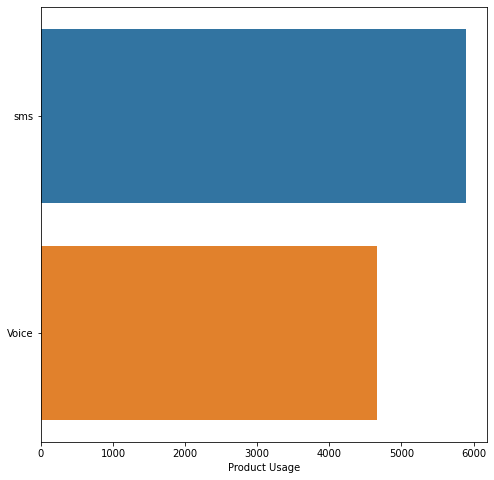

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

product_usage = plt.figure(figsize=(8,8))
usage = df_all['product'].value_counts()
sns.barplot(x= usage, y=usage.index)
plt.xlabel('Product Usage')
plt.savefig('usage.png')
files.download('usage.png')

# SMS services are more frequently used

In [117]:
services = df_all['product'].value_counts(normalize=True)
services

sms      0.558715
Voice    0.441285
Name: product, dtype: float64

#Which product brings in more money?

In [123]:
profits = df_all.groupby(['product'])['value'].sum()
(profits / profits.sum())*100

product
Voice    84.419609
sms      15.580391
Name: value, dtype: float64

# Group by value

In [126]:

df_all.groupby(['city'])['value'].sum().sort_values(ascending=False)

city
YOPOUGON           41970
COCODY             37936
ABOBO              23643
KOUMASSI           14701
TREICHVILLE        13597
                   ...  
ETUEBOUE               0
EBIKRO                 0
DOUGROUPALEGNOA        0
SAMO                   0
KONGASSO               0
Name: value, Length: 400, dtype: int64

# Which city brings in more money per product?


In [127]:
product_bills = df_all.groupby(['city','product'])['value'].sum().reset_index()
product_bills

,city,product,value
0,ABENGOUROU,Voice,1731
1,ABENGOUROU,sms,325
2,ABOBO,Voice,18009
3,ABOBO,sms,5634
4,ABOISSO,Voice,268
...,...,...,...
596,ZON-HOUNIEN,Voice,121
597,ZOUKOUGBEU,Voice,188
598,ZOUKOUGBEU,sms,50
599,ZUENOULA,Voice,1182


# Recomendations

Results
*   Voice is the most popular product
*   'ffa6759bb2' is the busiest cell. Expansion on this cell needed

Region to Expand

After analysis, the following cities were identified to have the highest traffic based on available data and should therefore be the first cities to be considered in carrying out the upgrade plan:

* YOPOUGON
* ABOBO
*COCODY
*ADJAME
*KOUMASSI
*MARCORY
*YAMOUSSOUKRO

After comparison, the sms product was found to have a higher frequency of usage than the voice product. SMS occupying 61.4% while Voice occupies 38.5% of the total traffic. However, it is important to note that voice brings in 81.2% of the total profits while sms only brings in 18.7%.

Among the high traffic cities, the following 5 cities bring in the highest profits, from both products:

* YOPOUGON
* COCODY
* ABOBO
* KOUMASSI
* TREICHVILLE
